In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams["figure.figsize"]=(10,6)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [4]:
data=pd.read_csv("train_ver2.csv",nrows=7e6)

data.info()

/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_10095/2748994526.py:1: DtypeWarning: Columns (5,8,10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("train_ver2.csv",nrows=7e6)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta             

In [5]:
#unique_ids

unique_id=pd.Series(data["ncodpers"].unique())
unique_id=unique_id.sample(n=130000)
data_unique_id=data[data.ncodpers.isin(unique_id)]

In [6]:
data_unique_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006630 entries, 1 to 6999990
Data columns (total 48 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   fecha_dato             1006630 non-null  object 
 1   ncodpers               1006630 non-null  int64  
 2   ind_empleado           1002754 non-null  object 
 3   pais_residencia        1002754 non-null  object 
 4   sexo                   1002744 non-null  object 
 5   age                    1006630 non-null  object 
 6   fecha_alta             1002754 non-null  object 
 7   ind_nuevo              1002754 non-null  float64
 8   antiguedad             1006630 non-null  object 
 9   indrel                 1002754 non-null  float64
 10  ult_fec_cli_1t         1614 non-null     object 
 11  indrel_1mes            991577 non-null   object 
 12  tiprel_1mes            991577 non-null   object 
 13  indresi                1002754 non-null  object 
 14  indext                 

In [7]:
data_unique_id['ncodpers'].count()

np.int64(1006630)

In [8]:
#change datatype 
data_unique_id['age']=pd.to_numeric(data_unique_id['age'],errors='coerce')
data_unique_id['antiguedad']=pd.to_numeric(data_unique_id['antiguedad'],errors='coerce') # cutomer seniority
data_unique_id['indrel_1mes']=pd.to_numeric(data_unique_id['indrel_1mes'],errors='coerce') # customer type 
data_unique_id['sexo'] = data_unique_id['sexo'].astype(str) # gender 
data_unique_id['ind_nuevo'] = data_unique_id['ind_nuevo'].astype(str) #New customer index
data_unique_id['ult_fec_cli_1t'] = pd.to_datetime(data_unique_id['ult_fec_cli_1t'],errors="coerce") #last date as primary customer
data_unique_id['indext'] = data_unique_id['indext'].astype(str) #foreginer index


/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_10095/3707300375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unique_id['age']=pd.to_numeric(data_unique_id['age'],errors='coerce')
/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_10095/3707300375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unique_id['antiguedad']=pd.to_numeric(data_unique_id['antiguedad'],errors='coerce') # cutomer seniority
/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_10095/3707300

In [9]:
data_unique_id.isnull().sum()

fecha_dato                     0
ncodpers                       0
ind_empleado                3876
pais_residencia             3876
sexo                           0
age                         3876
fecha_alta                  3876
ind_nuevo                      0
antiguedad                  3876
indrel                      3876
ult_fec_cli_1t           1005016
indrel_1mes                15109
tiprel_1mes                15053
indresi                     3876
indext                         0
conyuemp                 1006466
canal_entrada              17202
indfall                     3876
tipodom                     3876
cod_prov                    8979
nomprov                     8979
ind_actividad_cliente       3876
renta                     178588
segmento                   17306
ind_ahor_fin_ult1              0
ind_aval_fin_ult1              0
ind_cco_fin_ult1               0
ind_cder_fin_ult1              0
ind_cno_fin_ult1               0
ind_ctju_fin_ult1              0
ind_ctma_f

In [10]:
#droping two column with most null values

df=data_unique_id.drop(['conyuemp','ult_fec_cli_1t'],axis=1)

In [11]:
unique_counts = df.nunique().to_frame(name='unique_count').T
unique_counts


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
unique_count,10,130000,4,68,3,113,6076,3,250,2,4,4,2,3,149,2,1,52,52,2,95299,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [12]:
#filling the income missing value using median method 

median_income_by_province=df.groupby(['nomprov'])['renta'].median()

df["renta"] = df["renta"].fillna(df["nomprov"].map(median_income_by_province))

In [13]:
df.isnull().sum()

fecha_dato                   0
ncodpers                     0
ind_empleado              3876
pais_residencia           3876
sexo                         0
age                       3876
fecha_alta                3876
ind_nuevo                    0
antiguedad                3876
indrel                    3876
indrel_1mes              15109
tiprel_1mes              15053
indresi                   3876
indext                       0
canal_entrada            17202
indfall                   3876
tipodom                   3876
cod_prov                  8979
nomprov                   8979
ind_actividad_cliente     3876
renta                    36625
segmento                 17306
ind_ahor_fin_ult1            0
ind_aval_fin_ult1            0
ind_cco_fin_ult1             0
ind_cder_fin_ult1            0
ind_cno_fin_ult1             0
ind_ctju_fin_ult1            0
ind_ctma_fin_ult1            0
ind_ctop_fin_ult1            0
ind_ctpp_fin_ult1            0
ind_deco_fin_ult1            0
ind_deme

In [14]:
df[df['renta'].isnull()]['nomprov'].unique()

array(['NAVARRA', 'GIPUZKOA', nan, 'ALAVA', 'BIZKAIA'], dtype=object)

In [15]:
df=df.dropna(axis=0)

In [16]:
df

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
1,2015-01-28,1050611,N,ES,V,23.0,2012-08-10,0.0,35.0,1.0,1.0,I,S,S,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
23,2015-01-28,1050589,N,ES,V,23.0,2012-08-10,0.0,35.0,1.0,1.0,I,S,N,KHE,N,1.0,22.0,HUESCA,0.0,119173.89,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
39,2015-01-28,1050669,N,ES,V,32.0,2012-08-10,0.0,35.0,1.0,1.0,A,S,N,KFC,N,1.0,29.0,MALAGA,1.0,171398.85,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
50,2015-01-28,1050704,N,ES,V,23.0,2012-08-10,0.0,35.0,1.0,1.0,I,S,N,KHE,N,1.0,8.0,BARCELONA,0.0,72880.80,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
55,2015-01-28,1050629,N,ES,V,55.0,2012-08-10,0.0,35.0,1.0,1.0,I,S,N,KHE,N,1.0,50.0,ZARAGOZA,0.0,101919.09,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999972,2015-10-28,830108,N,ES,H,56.0,2009-01-29,0.0,81.0,1.0,1.0,A,S,N,KAT,N,1.0,28.0,MADRID,1.0,227952.66,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0
6999983,2015-10-28,830131,N,ES,V,37.0,2009-02-02,0.0,80.0,1.0,1.0,A,S,N,KFA,N,1.0,14.0,CORDOBA,1.0,72731.70,02 - PARTICULARES,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,1
6999987,2015-10-28,830199,N,ES,H,58.0,2009-01-30,0.0,81.0,1.0,1.0,A,S,N,KAA,N,1.0,8.0,BARCELONA,1.0,199390.23,02 - PARTICULARES,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6999989,2015-10-28,830253,N,ES,H,50.0,2009-01-30,0.0,81.0,1.0,1.0,I,S,N,KAA,N,1.0,8.0,BARCELONA,1.0,133295.22,02 - PARTICULARES,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [17]:
df['antiguedad'].value_counts()

antiguedad
12.0     27638
21.0     23536
10.0     23093
23.0     20661
33.0     19798
36.0     19297
9.0      19072
35.0     18501
45.0     18341
24.0     17845
34.0     16799
22.0     15988
46.0     15975
47.0     14641
44.0     14222
11.0     13600
32.0     13084
8.0      12456
20.0     11838
48.0     11774
43.0      9700
13.0      8845
1.0       8327
37.0      7339
14.0      6942
164.0     6838
25.0      6807
165.0     6717
162.0     6553
38.0      6226
19.0      6222
2.0       6101
16.0      5855
26.0      5737
7.0       5653
161.0     5581
31.0      5489
15.0      5396
163.0     5365
18.0      5223
166.0     5104
160.0     4920
159.0     4802
81.0      4788
3.0       4662
117.0     4606
172.0     4578
5.0       4555
49.0      4514
6.0       4305
17.0      4212
39.0      4157
156.0     4148
168.0     4125
169.0     4109
174.0     3993
27.0      3863
173.0     3851
171.0     3805
105.0     3743
80.0      3682
119.0     3671
177.0     3645
134.0     3581
170.0     3568
118.0     3478

In [18]:
df[df['antiguedad']<0]=0

In [19]:
df['antiguedad'].value_counts()

antiguedad
12.0     27638
21.0     23536
10.0     23093
23.0     20661
33.0     19798
36.0     19297
9.0      19072
35.0     18501
45.0     18341
24.0     17845
34.0     16799
22.0     15988
46.0     15975
47.0     14641
44.0     14222
11.0     13600
32.0     13084
8.0      12456
20.0     11838
48.0     11774
43.0      9700
13.0      8845
1.0       8327
37.0      7339
14.0      6942
164.0     6838
25.0      6807
165.0     6717
162.0     6553
38.0      6226
19.0      6222
2.0       6101
16.0      5855
26.0      5737
7.0       5653
161.0     5581
31.0      5489
15.0      5396
163.0     5365
18.0      5223
166.0     5104
160.0     4920
159.0     4802
81.0      4788
3.0       4662
117.0     4606
172.0     4578
5.0       4555
49.0      4514
6.0       4305
17.0      4212
39.0      4157
156.0     4148
168.0     4125
169.0     4109
174.0     3993
27.0      3863
173.0     3851
171.0     3805
105.0     3743
80.0      3682
119.0     3671
177.0     3645
134.0     3581
170.0     3568
118.0     3478

In [20]:
#add a new column of the total number of products per customer accuqired 

df['total_product']=df.loc[:,"ind_ahor_fin_ult1":"ind_recibo_ult1"].sum(axis=1)

df['total_product']=pd.to_numeric(df["total_product"],errors="coerce")

In [21]:
df['pais_residencia'].value_counts()

pais_residencia
ES    956689
DE        10
BO        10
Name: count, dtype: int64

Text(0, 0.5, 'number of cutomer')

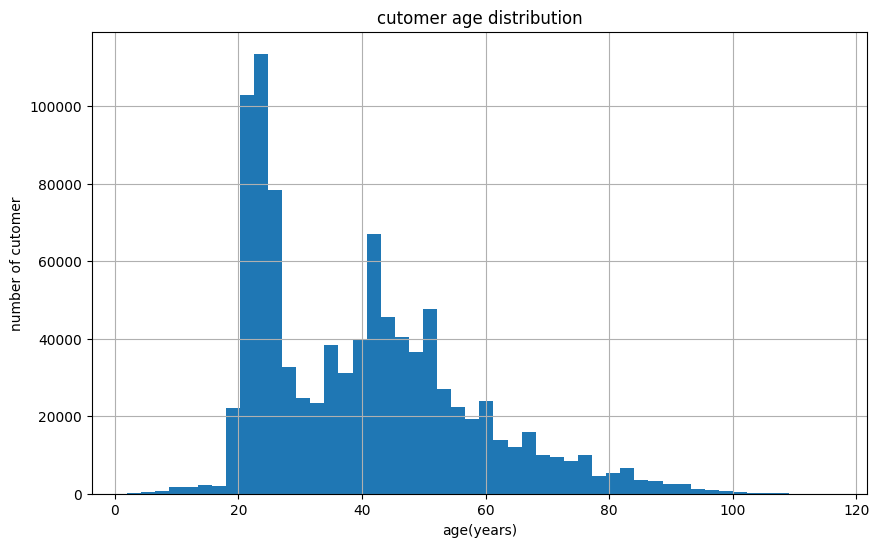

In [22]:
#age distribution

df['age'].hist(bins=50)
plt.title("cutomer age distribution")
plt.xlabel("age(years)")
plt.ylabel("number of cutomer")

In [23]:
#customer joined through a channel

df["canal_entrada"].value_counts().head(10)

canal_entrada
KHE    324182
KAT    244583
KFC    219655
KFA     29264
KHK     17094
KHQ     11173
KHD      9160
KAS      6498
KAG      5473
RED      5450
Name: count, dtype: int64

<Axes: ylabel='count'>

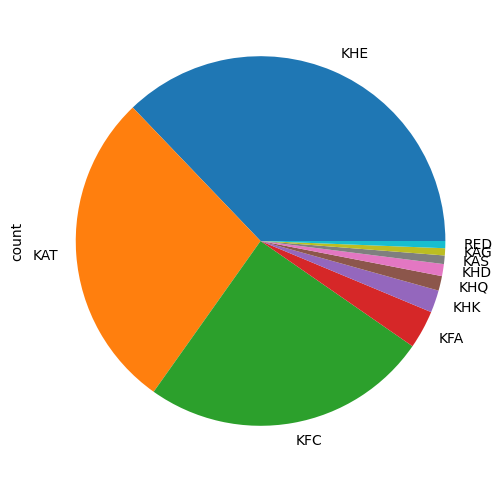

In [24]:

df["canal_entrada"].value_counts().head(10).plot(x=None,y=None,kind='pie')


In [ ]:
#activity index & sex & product

df_a= df.loc[:,['sexo',"ind_actividad_cliente"]].join(df.loc[:,"ind_ahor_fin_ult1":"ind_recibo_ult1"])

In [26]:
df_a=df_a.groupby(['sexo',"ind_actividad_cliente"]).sum()
df_a=df_a.T

In [27]:
df_a

sexo                          H                   V             nan
ind_actividad_cliente       0.0       1.0       0.0       1.0   1.0
ind_ahor_fin_ult1          19.0       4.0      10.0     127.0   0.0
ind_aval_fin_ult1           0.0      10.0       0.0      26.0   0.0
ind_cco_fin_ult1       168820.0  146296.0  161173.0  201186.0   0.0
ind_cder_fin_ult1           0.0      29.0      32.0     268.0   0.0
ind_cno_fin_ult1          548.0   34354.0     495.0   48753.0   0.0
ind_ctju_fin_ult1         910.0    3971.0    1002.0    4270.0   0.0
ind_ctma_fin_ult1         680.0    2771.0    1324.0    4326.0   0.0
ind_ctop_fin_ult1       16694.0   35205.0   27112.0   60660.0   0.0
ind_ctpp_fin_ult1        2951.0   14514.0    4883.0   24154.0   0.0
ind_deco_fin_ult1         117.0     840.0     160.0    1394.0   0.0
ind_deme_fin_ult1           0.0     755.0      14.0    1060.0   0.0
ind_dela_fin_ult1         146.0   18618.0     264.0   28611.0   0.0
ind_ecue_fin_ult1        2170.0   30499.0    4011.0   48886.0   0.0
ind_fond_fin_ult1          55.0    6336.0      78.0   13544.0   0.0
ind_hip_fin_ult1            9.0    1989.0      22.0    4894.0  10.0
ind_plan_fin_ult1          20.0    3865.0      27.0    6306.0   0.0
ind_pres_fin_ult1         161.0     760.0     329.0    1770.0   0.0
ind_reca_fin_ult1        1105.0   16889.0    2705.0   33329.0   0.0
ind_tjcr_fin_ult1         155.0   15813.0     296.0   31560.0   0.0
ind_valo_fin_ult1         103.0    7713.0     280.0   18950.0   0.0
ind_viv_fin_ult1          358.0    1257.0     644.0    2143.0   0.0
ind_nomina_ult1           143.0   23925.0     127.0   33710.0   0.0
ind_nom_pens_ult1         161.0   25956.0     149.0   36564.0   0.0
ind_recibo_ult1           457.0   51301.0     703.0   80899.0   0.0

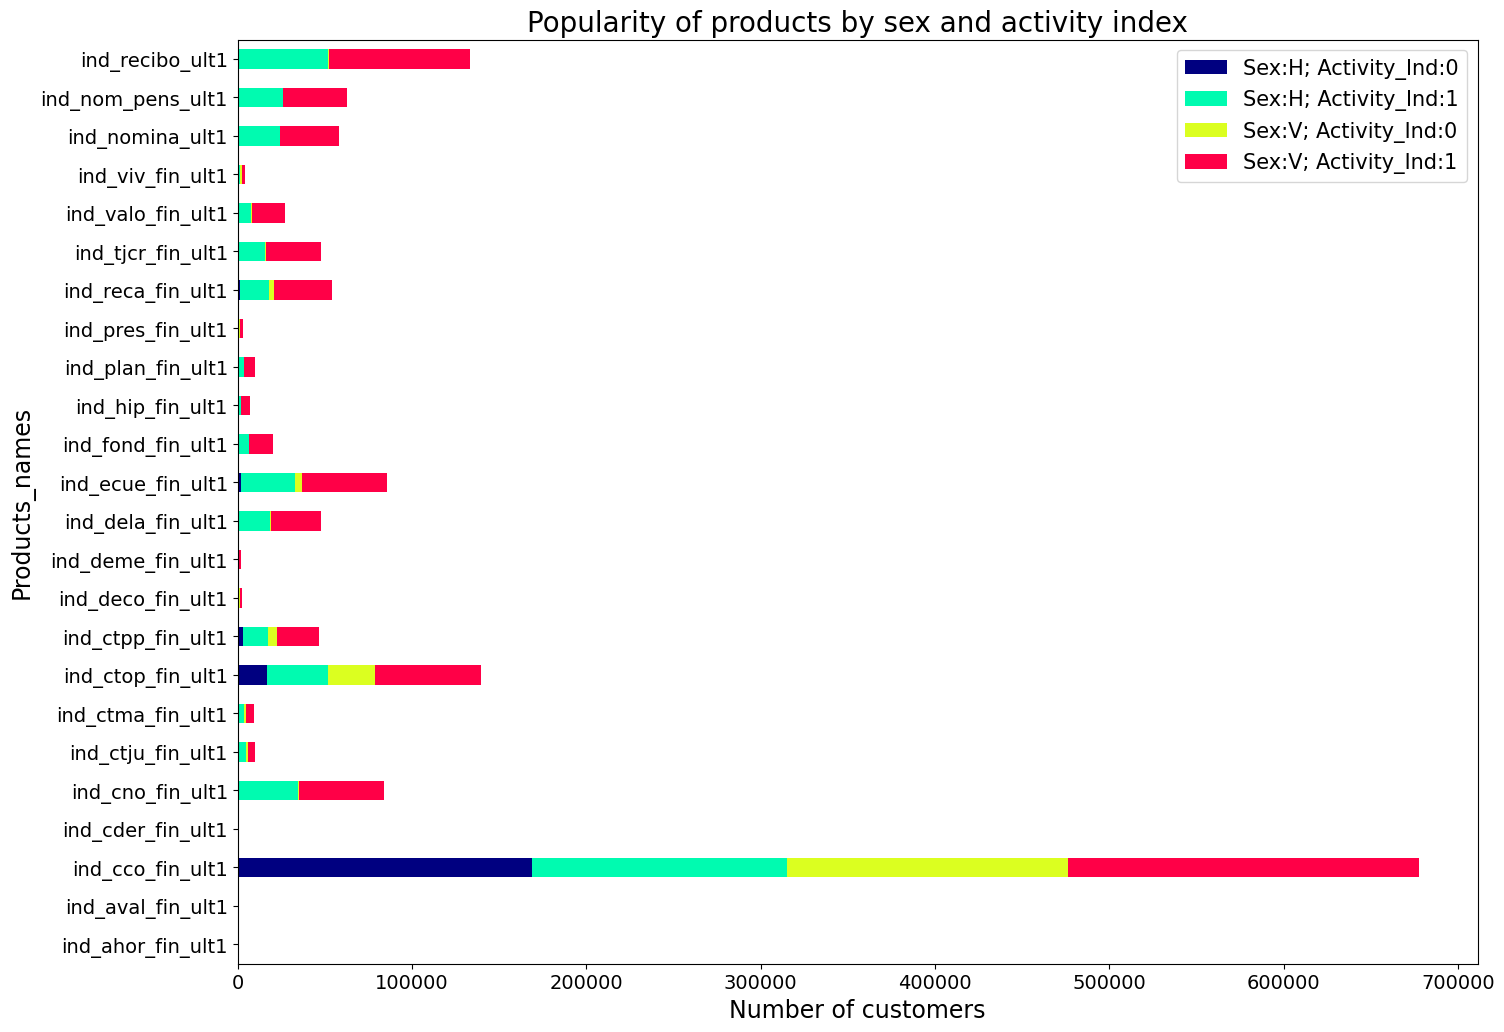

In [28]:
df_a.plot(kind="barh",stacked=True,fontsize=14,figsize=[16,12],colormap='gist_ncar')
plt.title('Popularity of products by sex and activity index', fontsize=20) 
plt.xlabel('Number of customers', fontsize=17) 
plt.ylabel('Products_names', fontsize=17) 
plt.legend(["Sex:H; Activity_Ind:0", "Sex:H; Activity_Ind:1", "Sex:V; Activity_Ind:0", 
            "Sex:V; Activity_Ind:1"], prop={'size':15}) 

In [29]:
#total number of products by age 

df_age=df.groupby(['age'])['total_product'].agg('sum')

In [30]:
df_age.sort_values(ascending=False).head(10)

age
23.0    60164.0
24.0    53803.0
22.0    52860.0
44.0    51095.0
43.0    50465.0
45.0    49080.0
42.0    46713.0
41.0    45526.0
46.0    45475.0
47.0    44313.0
Name: total_product, dtype: float64

Text(0.5, 0, 'age in years')

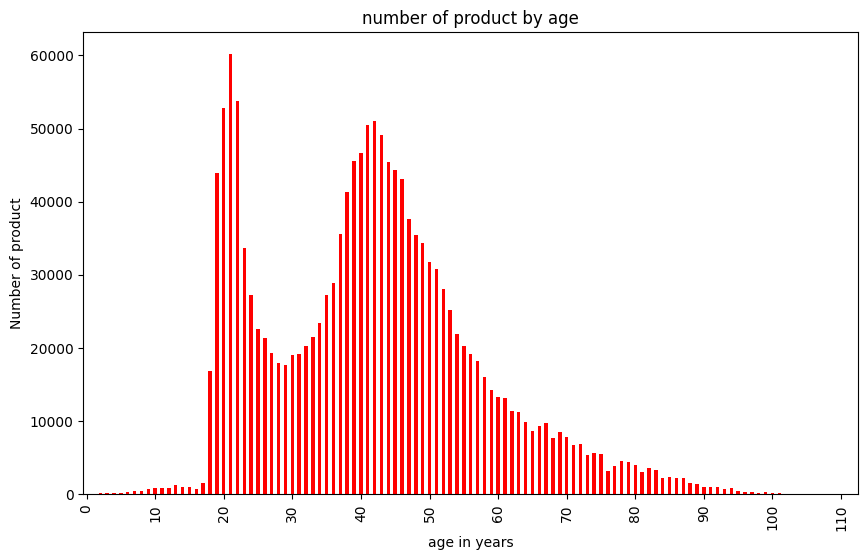

In [31]:
#Number of product by age
df_age.plot(kind='bar',colormap='autumn',legend=None)
plt.xticks(np.arange(0,120,10),[str(x) for x in np.arange(0,120,10)])
plt.title("number of product by age")
plt.ylabel("Number of product")
plt.xlabel('age in years')

In [ ]:
#Total number of product by segmentation

df_seg=df.groupby(['segmento'])["total_product"].agg('sum')
df_seg
#particulares are most important group

segmento
01 - TOP              183455.0
02 - PARTICULARES     971626.0
03 - UNIVERSITARIO    377611.0
Name: total_product, dtype: float64

In [ ]:
#Number of products by customer index

df_cust=df.groupby(['ind_nuevo'])['total_product'].agg('count')
df_cust
#most of the customer are recurrent customers,older than six months 

ind_nuevo
0.0    929471
1.0     27238
Name: total_product, dtype: int64

In [ ]:
#Number of products by customer regularity
df_cus_reg=df.groupby(['indrel'])['total_product'].agg('count')
df_cus_reg
# customer are regular customers throughout the month

indrel
1.0     955458
99.0      1251
Name: total_product, dtype: int64

In [ ]:
#Number of product customer type at the beginning of the month

df_cus_mth=df.groupby(['indrel_1mes'])['total_product'].agg('count')
df_cus_mth
#all customer are primary customers 

indrel_1mes
1.0    956706
3.0         3
Name: total_product, dtype: int64

In [ ]:
# Number of product by customer relation type at the beginning of the month 

df_cus_rel=df.groupby(['tiprel_1mes'])['total_product'].agg('count')
df_cus_rel
#customers are separated between active and inactive groups

tiprel_1mes
A    464232
I    492474
P         3
Name: total_product, dtype: int64

In [ ]:
#Number of products by customer's birth country in relation to the bank country

df_ban_cou=df.groupby(['indext'])['total_product'].agg("count")
df_ban_cou

#Most of the customer have their birth country different than the bank country

indext
N    915524
S     41185
Name: total_product, dtype: int64

In [42]:
#check number of products by channels

df_prod_chan=df.loc[:,['canal_entrada']].join(df.loc[:,'ind_ahor_fin_ult1':'ind_recibo_ult1'])
subset=["KHE","KAT","KFC",'KFA',"KHK"]

df_prod_chan=df_prod_chan.loc[df_prod_chan['canal_entrada'].isin(subset)]

In [43]:
df_prod_chan=df_prod_chan.groupby("canal_entrada").agg("sum")
df_prod_chan=df_prod_chan.T

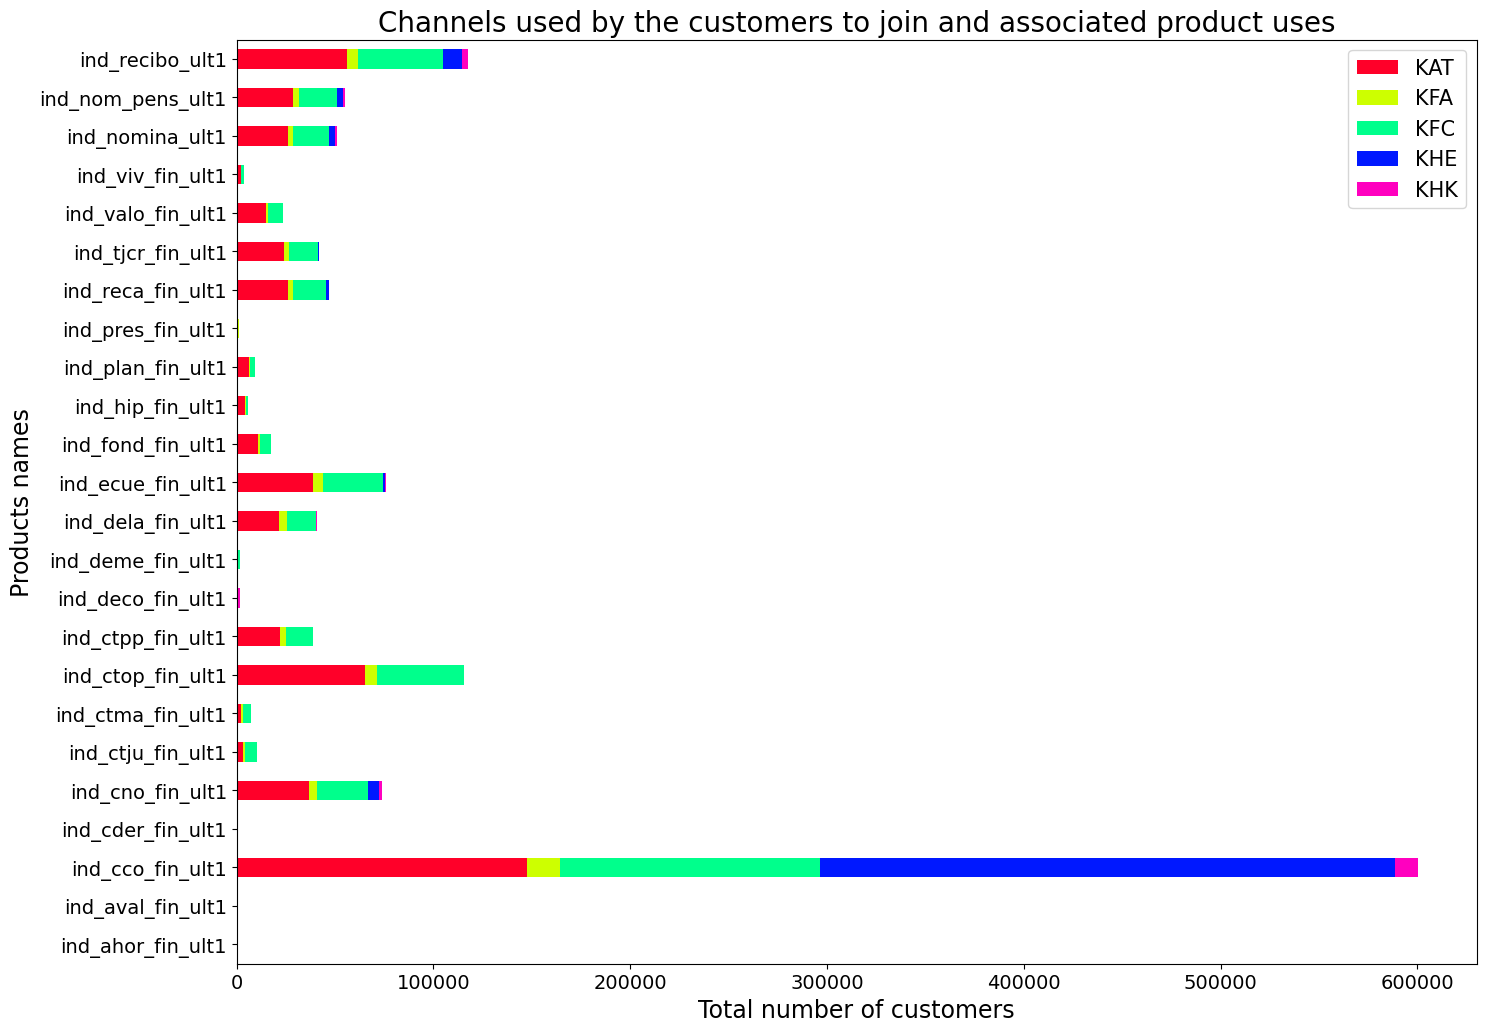

In [45]:
# Channels used by the customer to join and the purchased products
df_prod_chan.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Channels used by the customers to join and associated product uses', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(prop={'size':15})